In [ ]:

#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## 12 INTRO TO CLASSIFICATION DAY1 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs



In [1]:
#=================================================-
#### Slide 2: Directory settings  ####

# Set `main_dir` to the location of your `af-werx` folder (for Mac).
main_dir = '/Users/datasociety/Desktop/af-werx'
data_dir = main_dir + "/data"




In [2]:
#=================================================-
#### Slide 3: Loading packages  ####

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# New today - we will introduce it when we use it
import pickle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics



In [3]:
#=================================================-
#### Slide 4: Working directory  ####

# Set working directory.
os.chdir(data_dir)
# Check working directory.
print(os.getcwd())



/Users/datasociety/Desktop/af-werx/data


In [4]:
#=================================================-
#### Slide 22: Loading data into Python  ####

household_poverty = pd.read_csv("costa_rica_poverty.csv")
print(household_poverty.head())



  household_id        ind_id  rooms  tablet  males_under_12  males_over_12  \
0    21eb7fcc1  ID_279628684      3       0               0              1   
1    0e5d7a658  ID_f29eb3ddd      4       1               0              1   
2    2c7317ea8  ID_68de51c94      8       0               0              0   
3    2b58d945f  ID_d671db89c      5       1               0              2   
4    2b58d945f  ID_d56d6f5f5      5       1               0              2   

   males_tot  females_under_12  females_over_12  females_tot      ...       \
0          1                 0                0            0      ...        
1          1                 0                0            0      ...        
2          0                 0                1            1      ...        
3          2                 1                1            2      ...        
4          2                 1                1            2      ...        

   region_Chorotega  region_pacifico  region_brunca  region_an

In [5]:
#=================================================-
#### Slide 24: Subsetting data  ####

costa_knn = household_poverty[["household_id","rooms","num_adults","Target"]]
print(costa_knn.head())



  household_id  rooms  num_adults  Target
0    21eb7fcc1      3           1       4
1    0e5d7a658      4           1       4
2    2c7317ea8      8           1       4
3    2b58d945f      5           2       4
4    2b58d945f      5           2       4


In [6]:
#=================================================-
#### Slide 26: The data at first glance  ####

# The first 5 rows.
print(costa_knn.head())
# The data types.
print(costa_knn.dtypes)
print(costa_knn['Target'].value_counts())



  household_id  rooms  num_adults  Target
0    21eb7fcc1      3           1       4
1    0e5d7a658      4           1       4
2    2c7317ea8      8           1       4
3    2b58d945f      5           2       4
4    2b58d945f      5           2       4
household_id    object
rooms            int64
num_adults       int64
Target           int64
dtype: object
4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64


In [7]:
#=================================================-
#### Slide 27: Converting the target variable  ####

costa_knn['Target'] = np.where(costa_knn['Target'] <= 3, 'vulnerable','non_vulnerable')
print(costa_knn['Target'].head())



0    non_vulnerable
1    non_vulnerable
2    non_vulnerable
3    non_vulnerable
4    non_vulnerable
Name: Target, dtype: object


/Users/datasociety/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [8]:
#=================================================-
#### Slide 28: Data prep: check for NAs  ####

# Check for NAs.
print(costa_knn.isnull().sum())



household_id    0
rooms           0
num_adults      0
Target          0
dtype: int64


In [9]:
#=================================================-
#### Slide 29: Data prep: numeric variables  ####

print(costa_knn.dtypes)



household_id    object
rooms            int64
num_adults       int64
Target          object
dtype: object


In [10]:
#=================================================-
#### Slide 30: Data prep: ready for kNN  ####

print(costa_knn.Target.dtypes)
costa_knn["Target"] = np.where(costa_knn["Target"] == "non_vulnerable", True, False)

# Check class again.
print(costa_knn.Target.dtypes)



object
bool


/Users/datasociety/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [11]:
#=================================================-
#### Slide 32: Data prep: scaling variables  ####

# Split the data into X and y - y is categorical, so can't scale.
X = costa_knn[['rooms', 'num_adults']]
y = np.array(costa_knn['Target'])

# Scale X.
X_scaled = scale(X)
print(X_scaled[0:5])



[[-1.33182893 -1.3657179 ]
 [-0.65077114 -1.3657179 ]
 [ 2.07346003 -1.3657179 ]
 [ 0.03028665 -0.5080948 ]
 [ 0.03028665 -0.5080948 ]]


/Users/datasociety/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  if __name__ == '__main__':


In [13]:
#=================================================-
#### Slide 34: Exercise 1  ####





In [12]:
#=================================================-
#### Slide 40: Train & test: small scale before n-fold  ####

# Set the seed.
np.random.seed(1)

# Split into train and test.
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
y,
test_size = 0.3)




In [13]:
#=================================================-
#### Slide 43: kNN: build model  ####

# Create KNN classifier.
knn = KNeighborsClassifier(n_neighbors = 5)
# Fit the classifier to the data.
knn.fit(X_train, y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [14]:
#=================================================-
#### Slide 44: kNN: predict on test  ####

predictions = knn.predict(X_test)
print(predictions[0:5])



[ True False  True  True  True]


In [15]:
#=================================================-
#### Slide 45: kNN: predict on test  ####

actual_v_predicted = np.column_stack((y_test, predictions))
print(actual_v_predicted[0:5])



[[ True  True]
 [ True False]
 [ True  True]
 [ True  True]
 [ True  True]]


In [18]:
#=================================================-
#### Slide 47: Exercise 2  ####





In [16]:
#=================================================-
#### Slide 58: Confusion matrix in Python  ####

# Confusion matrix for knn.
cm_knn5 = confusion_matrix(y_test, predictions)
print(cm_knn5)
print(round(accuracy_score(y_test, predictions),
4))



[[ 294  768]
 [ 366 1440]]
0.6046


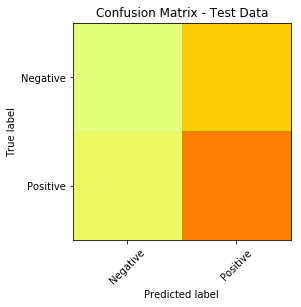

In [18]:
#=================================================-
#### Slide 59: Confusion matrix: visualize  ####

plt.imshow(cm_knn5, interpolation = 'nearest', cmap = plt.cm.Wistia)
classNames = ['Negative', 'Positive']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation = 45)
plt.yticks(tick_marks, classNames)
s = [['TN', 'FP'], ['FN', 'TP']]
#for i in range(2):
#    for j in range(2):
#        plt.text(j,i, str(s[i][j]) + " = " + str(cm_knn5[i][j]))
#        plt.show()



In [22]:
#=================================================-
#### Slide 60: Evaluation of kNN with 5 neighbors  ####

# Create a dictionary with accuracy values for our knn model with k = 5.
model_final_dict = {'metrics': ["accuracy"],
'values':[round(accuracy_score(y_test, predictions), 4)],
'model':['knn_5']}
model_final = pd.DataFrame(data = model_final_dict)
print(model_final)



    metrics  values  model
0  accuracy  0.6046  knn_5


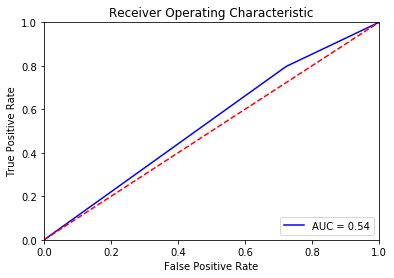

In [23]:
#=================================================-
#### Slide 64: Plot ROC and calculate AUC  ####

# Store FPR, TPR, and threshold as variables.
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
# Store the AUC.
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [24]:
#=================================================-
#### Slide 66: Exercise 3  ####





In [25]:
#=================================================-
#### Slide 77: Finding optimal k - GridSearchCV  ####

# Define the parameter values that should be searched.
k_range = list(range(1, 31))

# Create a parameter grid: map the parameter names to the values that should be searched by building a Python dictionary.
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(n_neighbors = k_range)
print(param_grid)

# Instantiate the grid using our original model - knn with k = 3.
grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')




{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [26]:
#=================================================-
#### Slide 78: Finding optimal k - GridSearchCV  ####

# Fit the grid with data.
grid.fit(X_scaled, y)



GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [27]:
#=================================================-
#### Slide 79: Finding optimal k - view results  ####

# View the complete results (list of named tuples).
print(grid.cv_results_['mean_test_score'])



[0.56293816 0.53311709 0.58198179 0.5597991  0.57967982 0.56816993
 0.58417914 0.57120435 0.57926127 0.57915664 0.59527048 0.58784137
 0.58627184 0.58009836 0.59788637 0.58187716 0.59684001 0.589097
 0.59715392 0.59684001 0.6015486  0.5944334  0.59485194 0.5908758
 0.60876844 0.60416449 0.6133724  0.6136863  0.61881344 0.61347703]


In [28]:
#=================================================-
#### Slide 80: Finding optimal k  ####

# Create a list of the mean scores only by using a list comprehension to loop through grid.cv_results_.
grid_mean_scores = [result for result in grid.cv_results_['mean_test_score']]
print(grid_mean_scores)



[0.5629381605106205, 0.5331170869519724, 0.5819817934498274, 0.559799100136026, 0.5796798158417914, 0.5681699278016114, 0.5841791357120435, 0.5712043528303861, 0.579261274458512, 0.5791566391126922, 0.5952704823689442, 0.5878413728157371, 0.5862718426284399, 0.5800983572250706, 0.5978863660144397, 0.5818771581040075, 0.5968400125562415, 0.5890969969655749, 0.5971539185937009, 0.5968400125562415, 0.6015486031181333, 0.5944333996023857, 0.594851940985665, 0.5908757978445118, 0.6087684419797007, 0.6041644867636288, 0.6133723971957727, 0.6136863032332321, 0.6188134351784033, 0.6134770325415926]


Text(0, 0.5, 'Cross-Validated Accuracy')

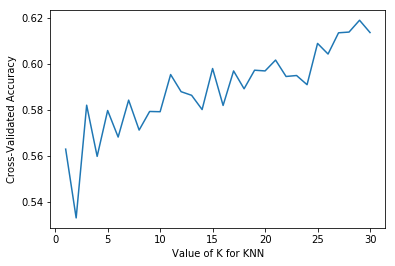

In [29]:
#=================================================-
#### Slide 81: Finding optimal k - plot  ####

# Plot the results.
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')



In [30]:
#=================================================-
#### Slide 82: Define and examine the optimized model   ####

# Single best score achieved across all params (k).
print(grid.best_score_)
grid_score = grid.best_score_

# Dictionary containing the parameters (k) used to generate that score.
print(grid.best_params_)

# Actual model object fit with those best parameters.
# Shows default parameters that we did not specify.
print(grid.best_estimator_)



0.6188134351784033
{'n_neighbors': 29}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=29, p=2,
           weights='uniform')


In [31]:
#=================================================-
#### Slide 83: Add GridSearchCV score to the final scores  ####

model_final = model_final.append({'metrics' : "accuracy" ,
'values' : round(grid_score, 4),
'model':'knn_GridSearchCV' } ,
ignore_index = True)
print(model_final)



    metrics  values             model
0  accuracy  0.6046             knn_5
1  accuracy  0.6188  knn_GridSearchCV


In [32]:
#=================================================-
#### Slide 84: Optimal model and final thoughts  ####

knn_best = grid.best_estimator_

# Check accuracy of our model on the test data.
print(knn_best.score(X_test, y_test))
knn_champ = knn_best.score(X_test, y_test)



0.6286610878661087


In [33]:
#=================================================-
#### Slide 85: Model champion dataframe  ####

# Add this final model champion to our dataframe.
model_final = model_final.append({'metrics' : "accuracy" ,
'values' : round(knn_champ, 4),
'model':'knn_29' } ,
ignore_index = True)
print(model_final)

pickle.dump(model_final, open("model_final.sav","wb" ))



    metrics  values             model
0  accuracy  0.6046             knn_5
1  accuracy  0.6188  knn_GridSearchCV
2  accuracy  0.6287            knn_29
